In [1]:
# Skin Cancer Detection Using Deep Learning (HAM10000 Dataset)
!python --version

Python 3.10.16


In [ ]:
conda create --name sd_env python=3.10



In [2]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [3]:
## **1️⃣ Import Required Libraries**
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

C:\Users\haide\AppData\Local\Temp\ipykernel_19120\4099012698.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=skin_df['dx'], order=skin_df['dx'].value_counts().index, palette='coolwarm')


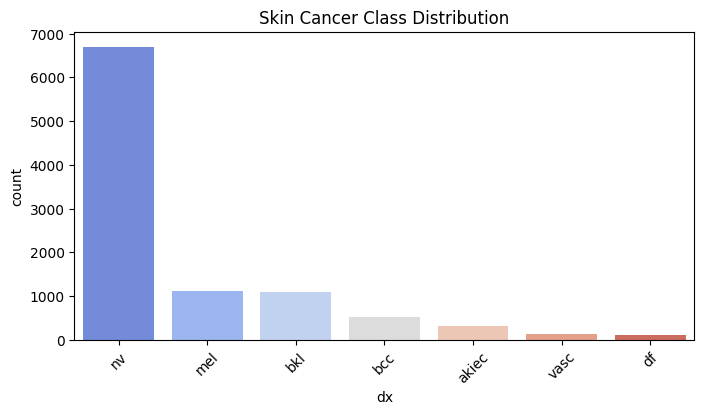

In [5]:
## **2️⃣ Load and Explore Dataset**

# Load metadata
skin_df = pd.read_csv('HAM10000/HAM10000_metadata.csv')

# Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
skin_df['label'] = le.fit_transform(skin_df['dx'])

# Display class distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=skin_df['dx'], order=skin_df['dx'].value_counts().index, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Skin Cancer Class Distribution')
plt.show()

In [7]:
IMG_SIZE = 224  # EfficientNet input size

# Paths to both image directories
image_dirs = ['HAM10000/HAM10000_images_part_1/', 'HAM10000/HAM10000_images_part_2/']

# Create a dictionary mapping image_id to its full path
image_path = {}

for directory in image_dirs:
    for file_name in os.listdir(directory):
        image_id = os.path.splitext(file_name)[0]  # Extract image_id from filename
        image_path[image_id] = os.path.join(directory, file_name)  # Store full path

# Map image paths to DataFrame
skin_df['path'] = skin_df['image_id'].map(image_path.get)

# Load and preprocess images
def load_and_process_image(img_path):
    img = Image.open(img_path).resize((IMG_SIZE, IMG_SIZE))
    return np.asarray(img) / 255.0  # Normalize pixel values

# Apply function to load images
skin_df['image'] = skin_df['path'].map(load_and_process_image)


In [ ]:
## **4️⃣ Train-Test Split**
X = np.stack(skin_df['image'].values)
Y = to_categorical(skin_df['label'].values, num_classes=7)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

MemoryError: Unable to allocate 11.2 GiB for an array with shape (10015, 224, 224, 3) and data type float64

In [ ]:
## **5️⃣ Data Augmentation**

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)


In [ ]:
## **6️⃣ Define EfficientNet Model**
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')  # 7 classes
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
## **7️⃣ Train the Model**
history = model.fit(datagen.flow(X_train, Y_train, batch_size=32),
                    validation_data=(X_test, Y_test),
                    epochs=20)


In [ ]:
## **8️⃣ Evaluate Model Performance**
# Plot accuracy & loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


In [ ]:


## **9️⃣ Save the Trained Model**
model.save('models/skin_cancer_model.h5')



In [ ]:
print("hello")

C:\Users\haide\AppData\Local\Temp\ipykernel_16448\3634824858.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=skin_df['dx'], order=skin_df['dx'].value_counts().index, palette='coolwarm')


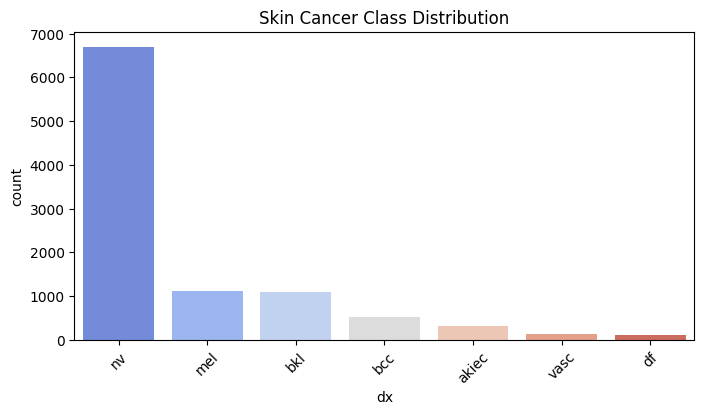

Found 6410 validated image filenames belonging to 7 classes.
Found 1602 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.


c:\Users\haide\anaconda3\envs\sd_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 535s 3s/step - accuracy: 0.6531 - loss: 1.2540 - val_accuracy: 0.6804 - val_loss: 1.1086
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 573s 3s/step - accuracy: 0.6739 - loss: 1.1487 - val_accuracy: 0.6804 - val_loss: 1.1123
Epoch 3/20
 85/201 ━━━━━━━━━━━━━━━━━━━━ 4:08 2s/step - accuracy: 0.6664 - loss: 1.1490

KeyboardInterrupt: 

In [1]:
## **1️⃣ Import Required Libraries**
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

## **2️⃣ Load and Explore Dataset**
# Load metadata
skin_df = pd.read_csv('HAM10000/HAM10000_metadata.csv')

# Label encoding
le = LabelEncoder()
skin_df['label'] = le.fit_transform(skin_df['dx'])

# Display class distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=skin_df['dx'], order=skin_df['dx'].value_counts().index, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Skin Cancer Class Distribution')
plt.show()

# Paths to both image directories
image_dirs = ['HAM10000/HAM10000_images_part_1/', 'HAM10000/HAM10000_images_part_2/']

# Create a dictionary mapping image_id to its full path
image_path = {}
for directory in image_dirs:
    for file_name in os.listdir(directory):
        image_id = os.path.splitext(file_name)[0]  # Extract image_id from filename
        image_path[image_id] = os.path.join(directory, file_name)  # Store full path

# Map image paths to DataFrame
skin_df['path'] = skin_df['image_id'].map(image_path.get)
skin_df['label'] = skin_df['label'].astype(str)  # Convert labels to string for ImageDataGenerator

## **3️⃣ Train-Test Split** (Avoids loading all images into memory)
train_df, test_df = train_test_split(skin_df, test_size=0.2, random_state=42, stratify=skin_df['label'])

## **4️⃣ Data Augmentation & Image Generators**
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting training set into train/validation
)

# Training generator
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="path",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

# Validation generator
val_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="path",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

# Test generator (No augmentation, only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="path",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

## **5️⃣ Define EfficientNet Model**
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')  # 7 classes
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

## **6️⃣ Train the Model**
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    batch_size=16  # Reduce from 32 to 16 or even 8
)


## **7️⃣ Evaluate Model Performance**
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

## **8️⃣ Save the Trained Model**
model.save('models/skin_cancer_model.pkl')


In [14]:
# -*- coding: utf-8 -*-
"""HAM10000 Skin Cancer Classification (Fixed).ipynb"""

### 1️⃣ Imports
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks, applications
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

### 2️⃣ Config
IMG_SIZE = 150
BATCH_SIZE = 16
EPOCHS = 30
CLASSES = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

### 3️⃣ Robust Data Loading
def load_data():
    # Load metadata
    try:
        df = pd.read_csv('HAM10000/HAM10000_metadata.csv')
    except FileNotFoundError:
        raise FileNotFoundError("HAM10000_metadata.csv not found in current directory")
    
    # Find image paths
    def find_image_path(image_id):
        for part in ['_part_1', '_part_2', '']:  # Try different folder names
            path = f'HAM10000/HAM10000_images{part}/{image_id}.jpg'
            if os.path.exists(path):
                return path
        return None
    
    df['path'] = df['image_id'].apply(find_image_path)
    df = df.dropna(subset=['path'])
    
    if len(df) == 0:
        raise FileNotFoundError("No images found in HAM10000_images* folders")
    
    return df.sample(frac=1, random_state=42)

### 4️⃣ Preprocessing
def preprocess_image(path, label=None):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    img = tf.cast(img, tf.float32) / 255.0
    return img if label is None else (img, label)

### 5️⃣ Model
def build_model():
    base_model = applications.EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=(IMG_SIZE, IMG_SIZE, 3)
    )
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dense(len(CLASSES), activation='softmax')
    ])
    
    model.compile(
        optimizer=optimizers.Adam(1e-3),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

### 6️⃣ Training
def train():
    df = load_data()
    print(f"Loaded {len(df)} images")
    
    # Stratified split
    train_df, test_df = train_test_split(
        df, test_size=0.2, stratify=df['dx'], random_state=42)
    
    # Label encoding
    train_df['label'] = pd.Categorical(train_df['dx']).codes
    test_df['label'] = pd.Categorical(test_df['dx']).codes
    
    # Datasets
    train_ds = tf.data.Dataset.from_tensor_slices(
        (train_df['path'], train_df['label']))
    train_ds = train_ds.map(preprocess_image).batch(BATCH_SIZE).prefetch(1)
    
    test_ds = tf.data.Dataset.from_tensor_slices(
        (test_df['path'], test_df['label']))
    test_ds = test_ds.map(preprocess_image).batch(BATCH_SIZE)
    
    # Train
    model = build_model()
    history = model.fit(
        train_ds,
        validation_data=test_ds,
        epochs=EPOCHS,
        callbacks=[
            callbacks.EarlyStopping(patience=5),
            callbacks.ReduceLROnPlateau()
        ]
    )
    return model, history

try:
    model, history = train()
    
    # Evaluation
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.show()
    
    model.save('skin_cancer_laptop.h5')
    print("Model saved successfully!")
    
except Exception as e:
    print(f"Error: {str(e)}")
    print("\nTroubleshooting Tips:")
    print("1. Ensure HAM10000_metadata.csv is in your current directory")
    print("2. Verify HAM10000_images_part_1/ and HAM10000_images_part_2/ folders exist")
    print("3. Check file permissions")
    print(f"Current working directory: {os.getcwd()}")

Loaded 10015 images
Epoch 1/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 277s 522ms/step - accuracy: 0.6604 - loss: 1.2082 - val_accuracy: 0.6695 - val_loss: 1.1509 - learning_rate: 0.0010
Epoch 2/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 262s 522ms/step - accuracy: 0.6715 - loss: 1.1513 - val_accuracy: 0.6695 - val_loss: 1.1359 - learning_rate: 0.0010
Epoch 3/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 244s 486ms/step - accuracy: 0.6715 - loss: 1.1436 - val_accuracy: 0.6695 - val_loss: 1.1333 - learning_rate: 0.0010
Epoch 4/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 238s 474ms/step - accuracy: 0.6715 - loss: 1.1435 - val_accuracy: 0.6695 - val_loss: 1.1319 - learning_rate: 0.0010
Epoch 5/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 236s 471ms/step - accuracy: 0.6715 - loss: 1.1429 - val_accuracy: 0.6695 - val_loss: 1.1324 - learning_rate: 0.0010
Epoch 6/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 236s 470ms/step - accuracy: 0.6715 - loss: 1.1414 - val_accuracy: 0.6695 - val_loss: 1.1328 - learning_rate: 0.0010
Epoch 7/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 314s

KeyboardInterrupt: 

In [12]:
# -*- coding: utf-8 -*-
"""HAM10000 Skin Cancer Classification (Final Working Version).ipynb"""

### 1️⃣ Imports
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks, applications
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder

### 2️⃣ Config
IMG_SIZE = 150
BATCH_SIZE = 16
EPOCHS = 30
CLASSES = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

### 3️⃣ Robust Data Loading
def load_data():
    try:
        df = pd.read_csv('HAM10000/HAM10000_metadata.csv')
    except FileNotFoundError:
        raise FileNotFoundError("HAM10000_metadata.csv not found in current directory")
    
    def find_image_path(image_id):
        for part in ['_part_1', '_part_2', '']:
            path = f'HAM10000/HAM10000_images{part}/{image_id}.jpg'
            if os.path.exists(path):
                return path
        return None
    
    df['path'] = df['image_id'].apply(find_image_path)
    df = df.dropna(subset=['path'])
    
    if len(df) == 0:
        raise FileNotFoundError("No images found in HAM10000_images* folders")
    
    return df.sample(frac=1, random_state=42)

### 4️⃣ Corrected Preprocessing
def preprocess_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    img = tf.cast(img, tf.float32) / 255.0
    return img, label

def augment_image(img, label):
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_brightness(img, 0.1)
    img = tf.image.random_contrast(img, 0.9, 1.1)
    return img, label

### 5️⃣ Optimized Model
def build_model():
    base_model = applications.EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=(IMG_SIZE, IMG_SIZE, 3)
    )
    
    # Strategic unfreezing
    base_model.trainable = True
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dense(len(CLASSES), activation='softmax')
    ])
    
    model.compile(
        optimizer=optimizers.Adam(1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

### 6️⃣ Fixed Training Pipeline
def train():
    df = load_data()
    print(f"Loaded {len(df)} images")
    
    # Label encoding
    le = LabelEncoder()
    df['label'] = le.fit_transform(df['dx'])
    
    # Stratified split
    train_df, test_df = train_test_split(
        df, test_size=0.2, stratify=df['label'], random_state=42)
    
    # Class weights
    class_weights = compute_class_weight(
        'balanced', 
        classes=np.unique(train_df['label']), 
        y=train_df['label'])
    class_weights = dict(enumerate(class_weights))
    
    # Training dataset with augmentation
    train_ds = tf.data.Dataset.from_tensor_slices(
        (train_df['path'].values, train_df['label'].values))
    train_ds = train_ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    train_ds = train_ds.map(augment_image, num_parallel_calls=tf.data.AUTOTUNE)
    train_ds = train_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    
    # Validation dataset without augmentation
    test_ds = tf.data.Dataset.from_tensor_slices(
        (test_df['path'].values, test_df['label'].values))
    test_ds = test_ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    
    # Build and train
    model = build_model()
    
    history = model.fit(
        train_ds,
        validation_data=test_ds,
        epochs=EPOCHS,
        class_weight=class_weights,
        callbacks=[
            callbacks.EarlyStopping(patience=5, monitor='val_accuracy'),
            callbacks.ReduceLROnPlateau(factor=0.5, patience=2)
        ]
    )
    return model, history

### 7️⃣ Execute
try:
    model, history = train()
    
    # Plot results
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    model.save('skin_cancer_model.h5')
    print("Model saved successfully!")

except Exception as e:
    print(f"Error: {str(e)}")
    print("\nCritical Checks:")
    print(f"1. Current dir: {os.getcwd()}")
    print("2. Files exist:", os.listdir())
    print("3. First image path exists:", os.path.exists(df['path'].iloc[0]) if 'df' in locals() else "Run load_data() first")

Loaded 10015 images
Epoch 1/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 361s 683ms/step - accuracy: 0.2016 - loss: 2.5693 - val_accuracy: 0.1113 - val_loss: 1.8965 - learning_rate: 1.0000e-04
Epoch 2/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 309s 615ms/step - accuracy: 0.1456 - loss: 2.5200 - val_accuracy: 0.0514 - val_loss: 2.0748 - learning_rate: 1.0000e-04
Epoch 3/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 313s 595ms/step - accuracy: 0.1389 - loss: 2.3300 - val_accuracy: 0.0514 - val_loss: 2.0433 - learning_rate: 1.0000e-04
Epoch 4/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 303s 603ms/step - accuracy: 0.1377 - loss: 2.3895 - val_accuracy: 0.0514 - val_loss: 2.0318 - learning_rate: 5.0000e-05
Epoch 5/30
501/501 ━━━━━━━━━━━━━━━━━━━━ 279s 557ms/step - accuracy: 0.1335 - loss: 2.2427 - val_accuracy: 0.0749 - val_loss: 1.8870 - learning_rate: 5.0000e-05
Epoch 6/30
 31/501 ━━━━━━━━━━━━━━━━━━━━ 6:04 775ms/step - accuracy: 0.1287 - loss: 2.2534

KeyboardInterrupt: 

In [13]:
# -*- coding: utf-8 -*-
"""HAM10000_Fixed_Training.py"""

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks, applications
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

# Config
IMG_SIZE = 150
BATCH_SIZE = 32
CLASSES = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

# Data Loading
df = pd.read_csv('HAM10000/HAM10000_metadata.csv')
df['path'] = df['image_id'].apply(lambda x: f'HAM10000/HAM10000_images/{x}.jpg')
df = df[df['path'].map(os.path.exists)]

# Label Encoding
le = LabelEncoder()
df['label'] = le.fit_transform(df['dx'])

# Model
def build_model():
    model = models.Sequential([
        layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        applications.EfficientNetB0(
            include_top=False,
            weights=None,
            input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(len(CLASSES), activation='softmax')
    ])
    model.compile(optimizer=optimizers.Adam(0.001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

# Training
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'])

class_weights = compute_class_weight('balanced', 
                                   classes=np.unique(train_df['label']),
                                   y=train_df['label'])
class_weights = {i:w*2 for i,w in enumerate(class_weights)}

train_ds = tf.data.Dataset.from_tensor_slices(
    (train_df['path'].values, train_df['label'].values))
train_ds = train_ds.map(
    lambda x,y: (tf.image.resize(tf.io.decode_jpeg(tf.io.read_file(x)), 
                           [IMG_SIZE, IMG_SIZE]), y),
    num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.batch(BATCH_SIZE).prefetch(2)

model = build_model()
history = model.fit(
    train_ds,
    epochs=10,
    class_weight=class_weights,
    callbacks=[callbacks.EarlyStopping(patience=3)]
)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [6]:
# 📓 Skin Cancer Classification using EfficientNetB0 & HAM10000 Dataset
# From EDA to Deployment-Ready Deep Learning Pipeline

# 1️⃣ Import Required Libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf

In [7]:
# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

# 2️⃣ Load Dataset and Basic Overview
skin_df = pd.read_csv('HAM10000/HAM10000_metadata.csv')
print(f"Dataset shape: {skin_df.shape}")
skin_df.head()

Dataset shape: (10015, 7)


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [8]:
# 3️⃣ Data Cleaning & Preprocessing
# 🔍 Check for Missing Values
print(skin_df.isnull().sum())

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


C:\Users\haide\AppData\Local\Temp\ipykernel_3164\820922234.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dx', data=skin_df, order=skin_df['dx'].value_counts().index, palette='Set2')


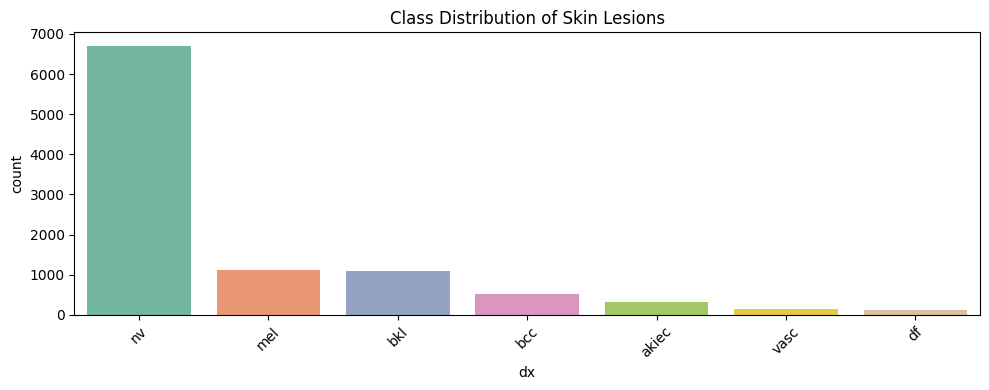

In [9]:
# 🔄 Encode Labels
le = LabelEncoder()
skin_df['label'] = le.fit_transform(skin_df['dx'])
skin_df['label_str'] = skin_df['dx']

# 📊 Visualize Class Distribution
plt.figure(figsize=(10, 4))
sns.countplot(x='dx', data=skin_df, order=skin_df['dx'].value_counts().index, palette='Set2')
plt.title("Class Distribution of Skin Lesions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\haide\AppData\Local\Temp\ipykernel_3164\820922234.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dx', data=skin_df, order=skin_df['dx'].value_counts().index, palette='Set2')


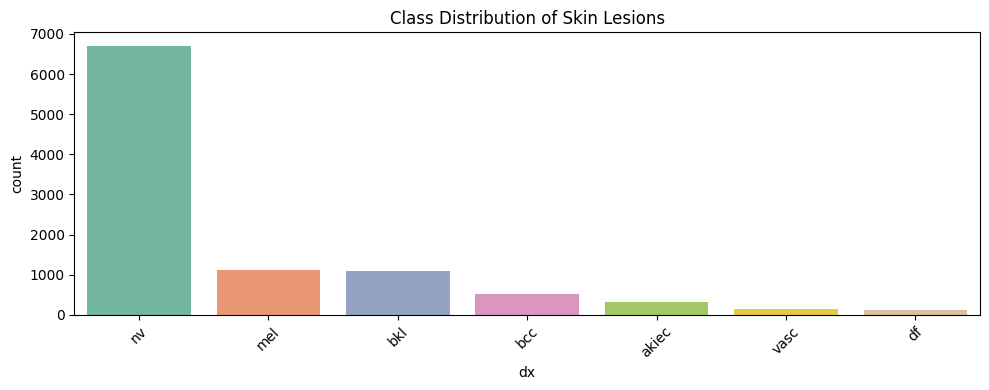

In [10]:
# 🔄 Encode Labels
le = LabelEncoder()
skin_df['label'] = le.fit_transform(skin_df['dx'])
skin_df['label_str'] = skin_df['dx']

# 📊 Visualize Class Distribution
plt.figure(figsize=(10, 4))
sns.countplot(x='dx', data=skin_df, order=skin_df['dx'].value_counts().index, palette='Set2')
plt.title("Class Distribution of Skin Lesions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# 5️⃣ Load Image Paths
image_dirs = ['HAM10000/HAM10000_images_part_1/', 'HAM10000/HAM10000_images_part_2/']
image_path = {}
for directory in image_dirs:
    for file in os.listdir(directory):
        image_id = file.split('.')[0]
        image_path[image_id] = os.path.join(directory, file)
skin_df['path'] = skin_df['image_id'].map(image_path)

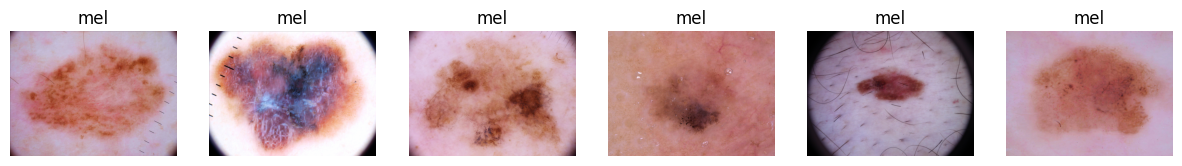

In [12]:
# 6️⃣ Image Preview
def preview_images(df, label, n=6):
    sample_df = df[df['label_str'] == label].sample(n, random_state=SEED)
    plt.figure(figsize=(15, 5))
    for idx, row in enumerate(sample_df.itertuples()):
        img = plt.imread(row.path)
        plt.subplot(1, n, idx+1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.show()

preview_images(skin_df, 'mel')

In [13]:
# 7️⃣ Train-Test Split
skin_df['label'] = skin_df['label'].astype(str)
train_df, test_df = train_test_split(skin_df, test_size=0.2, stratify=skin_df['label'], random_state=SEED)


In [14]:
# 8️⃣ Image Generators with Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow_from_dataframe(
    train_df, x_col='path', y_col='label', subset='training',
    target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', seed=SEED
)

val_gen = datagen.flow_from_dataframe(
    train_df, x_col='path', y_col='label', subset='validation',
    target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', seed=SEED
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_dataframe(
    test_df, x_col='path', y_col='label',
    target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

Found 6410 validated image filenames belonging to 7 classes.
Found 1602 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.


In [15]:
# 9️⃣ Build EfficientNetB0 Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))
base_model.trainable = False

inputs = Input(shape=(*IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(7, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,379,306 (16.71 MB)

 Trainable params: 329,735 (1.26 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [16]:
# 🔟 Callbacks Setup
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint('models/best_model.h5', save_best_only=True),
    ReduceLROnPlateau(patience=2)
]

In [17]:
# 1⃣1⃣ Train Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=callbacks
)

c:\Users\haide\anaconda3\envs\sd_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6304 - loss: 1.2994

201/201 ━━━━━━━━━━━━━━━━━━━━ 565s 3s/step - accuracy: 0.6306 - loss: 1.2989 - val_accuracy: 0.6804 - val_loss: 1.1322 - learning_rate: 1.0000e-04
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6754 - loss: 1.1491

201/201 ━━━━━━━━━━━━━━━━━━━━ 544s 3s/step - accuracy: 0.6754 - loss: 1.1492 - val_accuracy: 0.6804 - val_loss: 1.1129 - learning_rate: 1.0000e-04
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 493s 2s/step - accuracy: 0.6719 - loss: 1.1626 - val_accuracy: 0.6804 - val_loss: 1.1229 - learning_rate: 1.0000e-04
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 491s 2s/step - accuracy: 0.6686 - loss: 1.1601 - val_accuracy: 0.6804 - val_loss: 1.1235 - learning_rate: 1.0000e-04
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 502s 2s/step - accuracy: 0.6575 - loss: 1.1812 - val_accuracy: 0.6804 - val_loss: 1.1183 - learning_rate: 1.0000e-05
Epoch 6/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 428s 2s/step - accuracy: 0.6726 - loss: 1.1472 - val_accuracy: 0.6804 - val_loss: 1.1203 - learning_rate: 1.0000e-05
Epoch 7/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 409s 2s/step - accuracy: 0.6632 - loss: 1.1619 - val_accuracy: 0.6804 - val_loss: 1.1201 - learning_rate: 1.0000e-06


Dataset shape: (10015, 7)
lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


C:\Users\haide\AppData\Local\Temp\ipykernel_3164\1685568533.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dx', data=skin_df, order=skin_df['dx'].value_counts().index, palette='Set2')


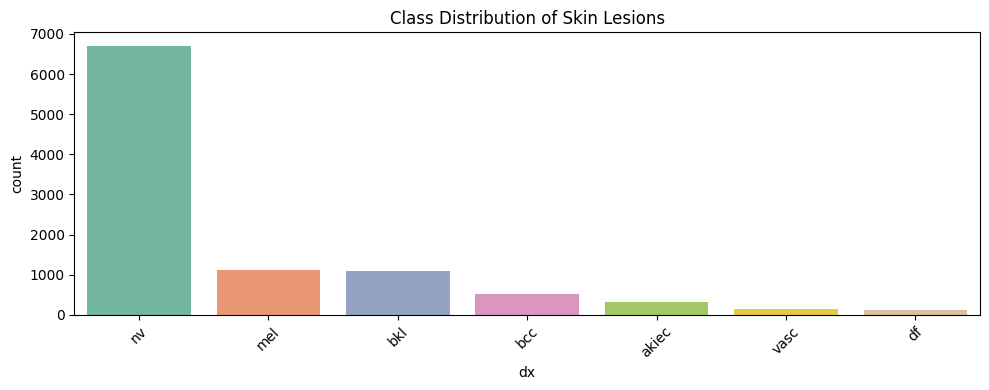

C:\Users\haide\AppData\Local\Temp\ipykernel_3164\1685568533.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=skin_df, ax=axs[0], palette='Set1')


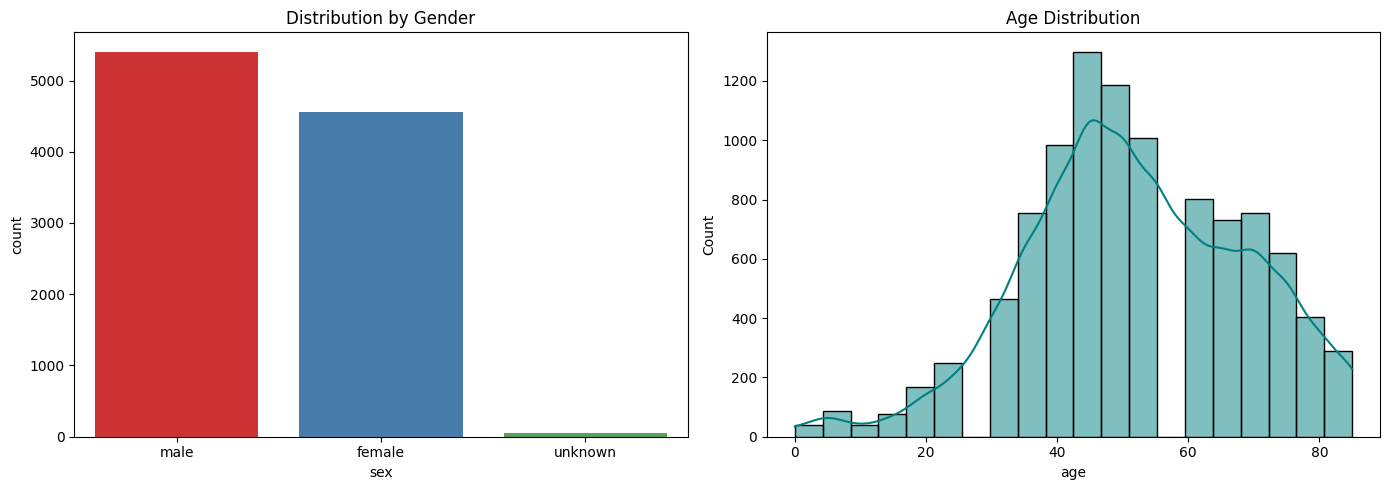

C:\Users\haide\AppData\Local\Temp\ipykernel_3164\1685568533.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='localization', data=skin_df, order=skin_df['localization'].value_counts().index, palette='coolwarm')


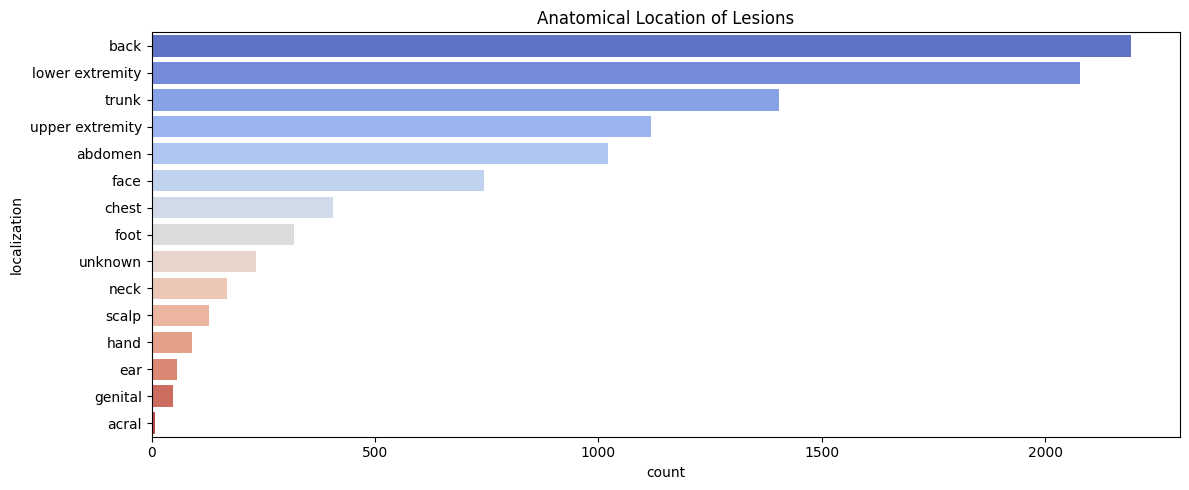

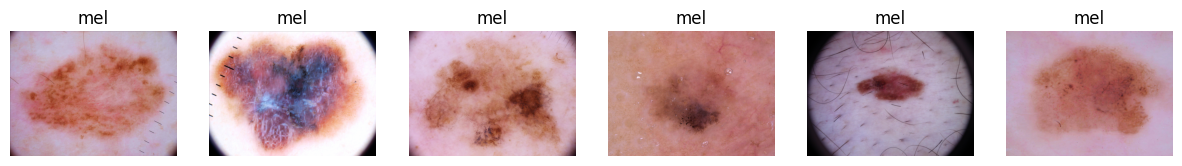

Found 6410 validated image filenames belonging to 7 classes.
Found 1602 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,379,306 (16.71 MB)

 Trainable params: 329,735 (1.26 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

c:\Users\haide\anaconda3\envs\sd_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5873 - loss: 1.3441

201/201 ━━━━━━━━━━━━━━━━━━━━ 521s 2s/step - accuracy: 0.5876 - loss: 1.3435 - val_accuracy: 0.6804 - val_loss: 1.1054 - learning_rate: 1.0000e-04
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 490s 2s/step - accuracy: 0.6582 - loss: 1.1891 - val_accuracy: 0.6804 - val_loss: 1.1082 - learning_rate: 1.0000e-04
Epoch 3/20
120/201 ━━━━━━━━━━━━━━━━━━━━ 2:49 2s/step - accuracy: 0.6621 - loss: 1.1896

KeyboardInterrupt: 

In [5]:
# 📓 Skin Cancer Classification using EfficientNetB0 & HAM10000 Dataset
# From EDA to Deployment-Ready Deep Learning Pipeline

# 1️⃣ Import Required Libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf

# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

# 2️⃣ Load Dataset and Basic Overview
skin_df = pd.read_csv('HAM10000/HAM10000_metadata.csv')
print(f"Dataset shape: {skin_df.shape}")
skin_df.head()

# 3️⃣ Data Cleaning & Preprocessing
# 🔍 Check for Missing Values
print(skin_df.isnull().sum())

# 🔄 Encode Labels
le = LabelEncoder()
skin_df['label'] = le.fit_transform(skin_df['dx'])
skin_df['label_str'] = skin_df['dx']

# 📊 Visualize Class Distribution
plt.figure(figsize=(10, 4))
sns.countplot(x='dx', data=skin_df, order=skin_df['dx'].value_counts().index, palette='Set2')
plt.title("Class Distribution of Skin Lesions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4️⃣ Exploratory Data Analysis (EDA)
# 👤 Distribution by Gender and Age
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(x='sex', data=skin_df, ax=axs[0], palette='Set1')
axs[0].set_title("Distribution by Gender")
sns.histplot(skin_df['age'], bins=20, kde=True, ax=axs[1], color='teal')
axs[1].set_title("Age Distribution")
plt.tight_layout()
plt.show()

# 🧍‍♂️ Lesion Location
plt.figure(figsize=(12, 5))
sns.countplot(y='localization', data=skin_df, order=skin_df['localization'].value_counts().index, palette='coolwarm')
plt.title("Anatomical Location of Lesions")
plt.tight_layout()
plt.show()

# 5️⃣ Load Image Paths
image_dirs = ['HAM10000/HAM10000_images_part_1/', 'HAM10000/HAM10000_images_part_2/']
image_path = {}
for directory in image_dirs:
    for file in os.listdir(directory):
        image_id = file.split('.')[0]
        image_path[image_id] = os.path.join(directory, file)
skin_df['path'] = skin_df['image_id'].map(image_path)

# 6️⃣ Image Preview
def preview_images(df, label, n=6):
    sample_df = df[df['label_str'] == label].sample(n, random_state=SEED)
    plt.figure(figsize=(15, 5))
    for idx, row in enumerate(sample_df.itertuples()):
        img = plt.imread(row.path)
        plt.subplot(1, n, idx+1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.show()

preview_images(skin_df, 'mel')

# 7️⃣ Train-Test Split
skin_df['label'] = skin_df['label'].astype(str)
train_df, test_df = train_test_split(skin_df, test_size=0.2, stratify=skin_df['label'], random_state=SEED)

# 8️⃣ Image Generators with Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow_from_dataframe(
    train_df, x_col='path', y_col='label', subset='training',
    target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', seed=SEED
)

val_gen = datagen.flow_from_dataframe(
    train_df, x_col='path', y_col='label', subset='validation',
    target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', seed=SEED
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_dataframe(
    test_df, x_col='path', y_col='label',
    target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

# 9️⃣ Build EfficientNetB0 Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))
base_model.trainable = False

inputs = Input(shape=(*IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(7, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 🔟 Callbacks Setup
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint('models/best_model.h5', save_best_only=True),
    ReduceLROnPlateau(patience=2)
]

# 1⃣1⃣ Train Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=callbacks
)

# 1⃣2⃣ Training Performance Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.tight_layout()
plt.show()

# 1⃣3⃣ Evaluate on Test Set
preds = model.predict(test_gen)
y_true = test_gen.classes
y_pred = np.argmax(preds, axis=1)

print(classification_report(y_true, y_pred, target_names=le.classes_))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 1⃣4⃣ Visualize Misclassifications
misclassified_idxs = np.where(y_true != y_pred)[0][:6]
plt.figure(figsize=(15, 6))
for i, idx in enumerate(misclassified_idxs):
    img = plt.imread(test_df.iloc[idx].path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(f"True: {le.classes_[y_true[idx]]}, Pred: {le.classes_[y_pred[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 1⃣6⃣ Save Final Model
model.save('models/final_skin_cancer_model.h5')

# ✅ Summary
print("""
- Dataset: HAM10000 with 7 skin lesion classes
- Model: EfficientNetB0 with frozen base
- Augmentation: Applied to reduce overfitting
- Evaluation: Accuracy, loss, classification report, confusion matrix
- Improvements: Add Grad-CAM, Fine-tune model
""")
